In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
import seaborn as sns 
from scipy.stats import zscore
from msresist.pca import plotPCA

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [4]:
d = pd.read_excel("msresist/data/Validations/2DGels/WT_gels.xlsx").drop(["AXL", "pAXL", "Lysate Concentration"], axis=1)
d = d.iloc[1:-2, :]
d.insert(0, "Treatment", [s.split(" ")[1] for s in d["Location"]])
d.insert(1, "Stiffness", [s.split(" ")[-1] for s in d["Location"]])
d = d.drop("Location", axis=1)
d = d[d["Stiffness"] != "2.5"]

In [5]:
d.iloc[:, 2:] = np.log(d.iloc[:, 2:])
d.iloc[:, 2:] = zscore(d.iloc[:, 2:], axis=0)

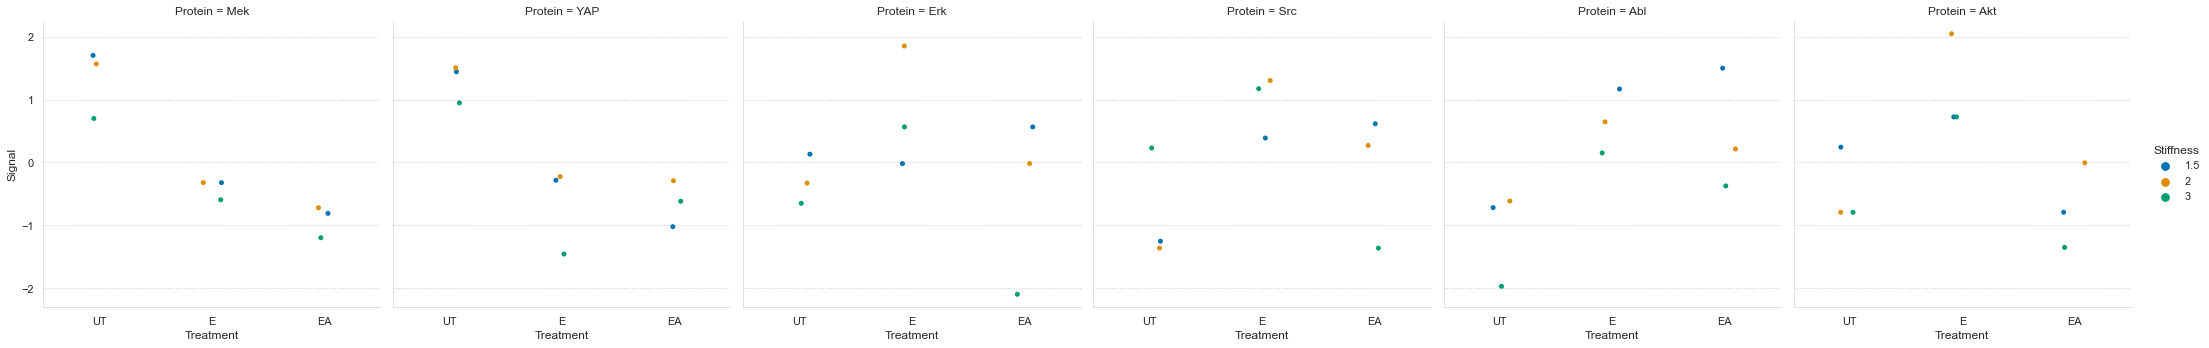

In [6]:
dm = pd.melt(d, id_vars=["Treatment", "Stiffness"], value_vars=d.columns[2:], value_name="Signal", var_name="Protein")
sns.catplot(data=dm, x="Treatment", y="Signal", hue="Stiffness", col="Protein")

No handles with labels found to put in legend.


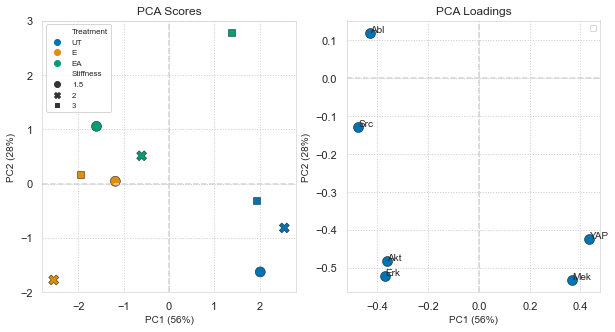

In [7]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))

plotPCA(ax, d, 2, ["Treatment", "Stiffness"], d.columns[2:], hue_scores="Treatment", style_scores="Stiffness", legendOut=False, quadrants=True)